In [1]:
from __future__ import division
from sympy import *
init_printing(use_unicode=True)

import numpy as np

# Plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

Systems of Equations
--------------------------

### Systems of Equations, Geometry

**Linear equation**: If $a$, $b$, and $c$ are real numbers, the graph of an equation of the form
$$ax+by = c$$
is a straight line (if $a$ and $b$ are not both zero), so such an equation is called a *linear equation* in the
*variables* $x$ and $y$.

**Example**: Solve \begin{cases}
x+y=0\\
x-y=0,\\
\end{cases}
Graphically.

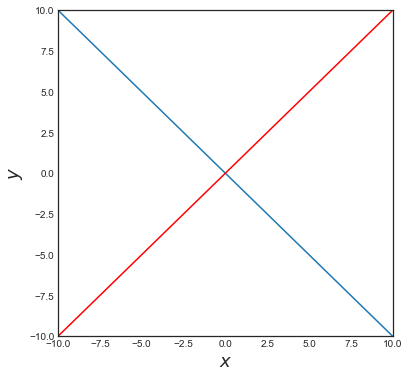

In [2]:
x = np.linspace( -10 , 10 ,100)
y1 = -x
y2 = x
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharex = False)
_ = ax.plot(x,y1,x,y2,'r')
_ = ax.set_xlabel('$x$', fontsize=18)
_ = ax.set_ylabel('$y$', fontsize=18)
_ = ax.set_xlim([min(x),max(x)])
_ = ax.set_ylim([min(y1),max(y1)])

**Example**: Solve 
\begin{cases}
x+y+z=2\\
x+y+z=5
\end{cases}.

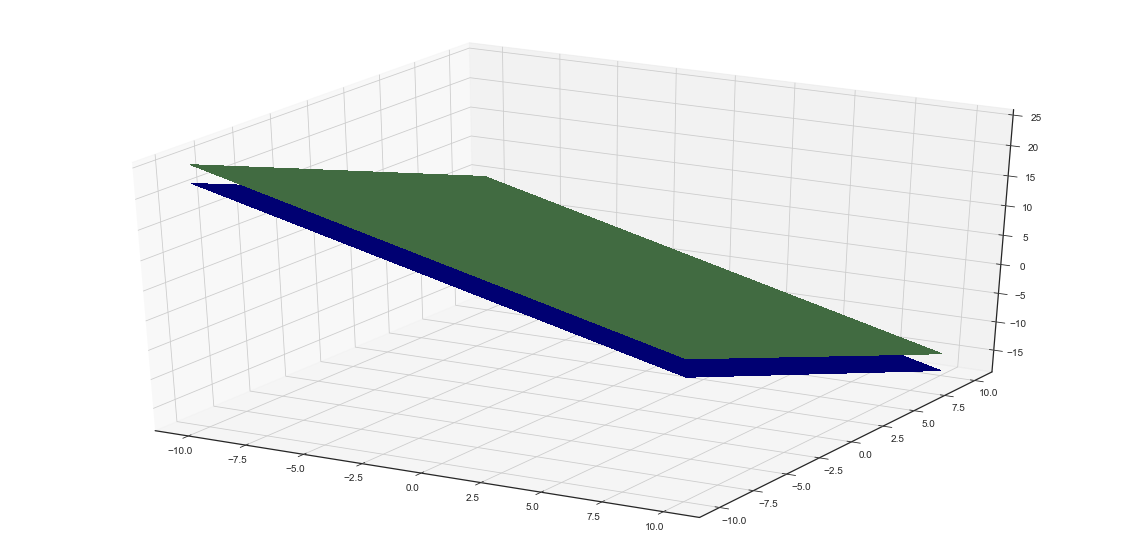

In [3]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace( -10 , 10 ,100)
Y = np.linspace( -10 , 10 ,100)
X, Y = np.meshgrid(X, Y)
Z1 = 2 - X - Y 
Z2 = 5 - X - Y 

# Plot the surface.
surf = ax.plot_surface(X, Y, Z1, color = 'blue', linewidth=0, antialiased=False)
_ = ax.plot_surface(X, Y, Z2, color = 'lightgreen', linewidth=0, antialiased=False)
# _ = ax.set_zlim(-10, 10)
# _ = ax.zaxis.set_major_locator(LinearLocator(10))
# _ = ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

Row-Echelon Form (Reduced)
---------------------------------------

A matrix is said to be in **row-echelon form** (REF) if it satisfies the
following three conditions:

1.  All **zero rows** (consisting entirely of zeros) are at the bottom.

2.  The first nonzero entry from the left in each nonzero row is a 1,
    called the **leading 1** for that row.

3.  Each leading 1 is to the right of all leading 1 s in the rows above
    it.

A row-echelon matrix is said to be in **reduced row-echelon form**
(RREF) if, in addition, it satisfies the following condition:

4.  Each leading 1 is the only nonzero entry in its column.

### Gaussian Algorithm

* **Step 1**: If the matrix consists entirely of zeros, stop—it is already in row-echelon form.
* **Step 2**: Otherwise, find the first column from the left containing a nonzero entry (call it a ),
and move the row containing that entry to the top position.
* **Step 3**: Now multiply the new top row by 1/a to create a leading 1 .
* **Step 4**: By subtracting multiples of that row from rows below it, make each entry below the
leading 1 zero.
This completes the first row, and all further row operations are carried out on the remaining rows.
* **Step 5**: Repeat steps 1–4 on the matrix consisting of the remaining rows.
The process stops when either no rows remain at step 5 or the remaining rows consist entirely of
zeros.

### Back-Substitution
The process of solving a linear system of equations that has been transformed into row-echelon form or reduced row-echelon form. The last equation is solved first, then the next-to-last, etc.

**Example**:  Solve the following linear system using back-substitution.
\begin{equation*}
\begin{cases}
x_{1}+2\,x_{2}+3\,x_{3}=2\\
4\,x_{1}-3\,x_{2}+x_{3}=-3\\
x_{2}-2\,x_{1}+3\,x_{3}=5
\end{cases}
\end{equation*}

The corresponding augmented matrix is

In [4]:
M = Matrix([[1 , 2 , 3 , 2], [4 , -3 , 1 , -3], [-2 , 1 , 3 , 5]]) 
M

⎡1   2   3  2 ⎤
⎢             ⎥
⎢4   -3  1  -3⎥
⎢             ⎥
⎣-2  1   3  5 ⎦

In RREF:

In [5]:
RREF= M.rref()[0]
RREF

⎡1  0  0  -1⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎣0  0  1  1 ⎦

Therefore, the solutions are:

In [6]:
print('$x_1$ = %i, $x_2$ = %i and $x_3$ = %i' % (RREF[0,-1], RREF[1,-1], RREF[2,-1]))

$x_1$ = -1, $x_2$ = 0 and $x_3$ = 1


or in vector form \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} equals to

In [7]:
RREF[:,-1]

⎡-1⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣1 ⎦

To verify our answer, we can use [linalg](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve) from Numpy. This requires converting the Matrix *M* into an [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html).

In [8]:
A = np.asarray(M[:,:-1], dtype = int)
B = np.asarray(M[:,-1], dtype = int)
np.linalg.solve(A, B)

array([[-1.],
       [ 0.],
       [ 1.]])

***